# Header

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Section 1
This is a bunch of text

In [86]:
np.random.seed(0)
df = pd.Series(np.random.randn(25), index=np.arange(0,25))
df = df.cumsum()
df.index.name = 'Min'

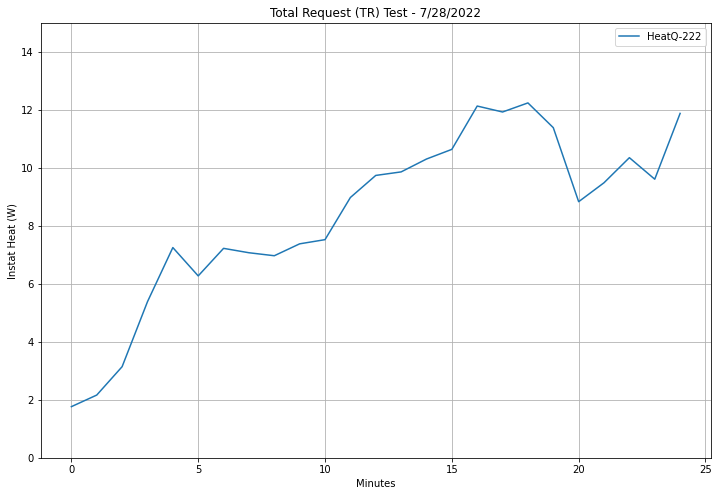

In [113]:
fig, ax = plt.subplots(figsize = (12,8))

ax.plot(df, label='HeatQ-222')
ax.set_ylim(bottom=0, top=15)

ax.set_title('Total Request (TR) Test - 7/28/2022')
ax.set_xlabel('Minutes')
ax.set_ylabel('Instat Heat (W)')
ax.grid()
ax.legend(loc='upper right', facecolor="white")


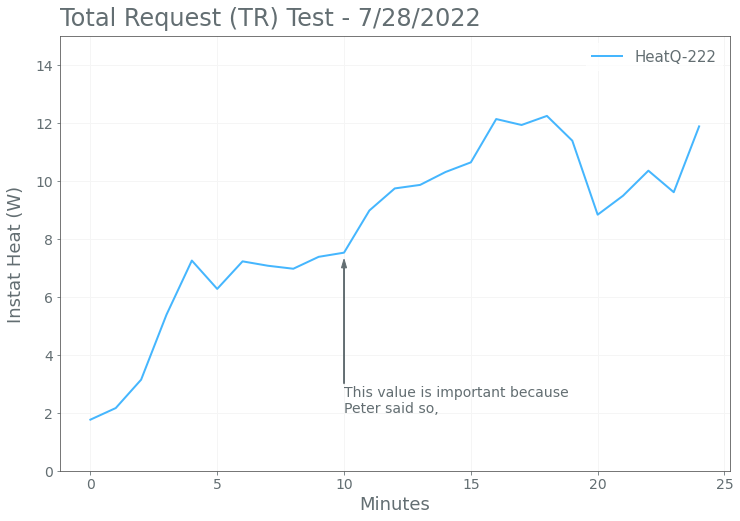

In [237]:
##
## Set color and font properties
##
modernBlue = '#45b6fe'
lightGray = '#F5F5F5'
textGray = '#636E72'

legendText = {'size': 15}
titleText = {'size':24, 'color':textGray}

axesLabel = {'size':18, 'color':textGray}
axesValues = 14


##
## Start Plot
##
fig, ax = plt.subplots(figsize = (12,8))

## Line plot
ax.plot(df, label='HeatQ-222', color=modernBlue, linewidth=2) 

for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_color('#565656')

## Title 
ax.set_title('Total Request (TR) Test - 7/28/2022', loc='left', fontdict=titleText, y =1.01)

## X and Y Axex
ax.set_ylim(bottom=0, top=15)
ax.set_xlabel('Minutes', fontdict=axesLabel)
ax.set_ylabel('Instat Heat (W)', fontdict=axesLabel, labelpad=10)
ax.tick_params(axis='both', colors=textGray, labelsize=axesValues)

## Grid and Legend
ax.grid(color=lightGray, linestyle='-', linewidth=1)
ax.set_axisbelow(True)
ax.legend(loc='upper right', prop=legendText, labelcolor=textGray, facecolor="white", edgecolor='white')

## Annotate
ax.arrow(10 ,3, 0, 4, head_width=0.2, color=textGray)
ax.annotate('This value is important because \nPeter said so,', (10, 2), fontsize=14, color=textGray);

Then you can crate a function of your graph and use that for the rest of your stuff.

In [234]:
def myFunc(_series, title):
    ##
    ## Set color and font properties
    ##
    modernBlue = '#45b6fe'
    lightGray = '#F5F5F5'
    textGray = '#636E72'

    legendText = {'size': 15}
    titleText = {'size':24, 'color':textGray}

    axesLabel = {'size':18, 'color':textGray}
    axesValues = 14


    ##
    ## Start Plot
    ##
    fig, ax = plt.subplots(figsize = (12,8))

    ## Line plot
    ax.plot(_series, label='HeatQ-222', color=modernBlue, linewidth=2) 

    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_color('#565656')

    ## Title 
    ax.set_title(title, loc='left', fontdict=titleText, y =1.03)

    ## X and Y Axex
    ax.set_ylim(bottom=0, top=15)
    ax.set_xlabel('Minutes', fontdict=axesLabel)
    ax.set_ylabel('Instat Heat (W)', fontdict=axesLabel, labelpad=10)
    ax.tick_params(axis='both', colors=textGray, labelsize=axesValues)

    ## Grid and Legend
    ax.grid(color=lightGray, linestyle='-', linewidth=1)
    ax.set_axisbelow(True)
    ax.legend(loc='upper right', prop=legendText, labelcolor=textGray, facecolor="white", edgecolor='white')

    ## Annotate
    ax.arrow(10 ,3, 0, 4, head_width=0.2, color=textGray)
    ax.annotate('This value is important because \nPeter said so,', (10, 2), fontsize=14, color=textGray)
    

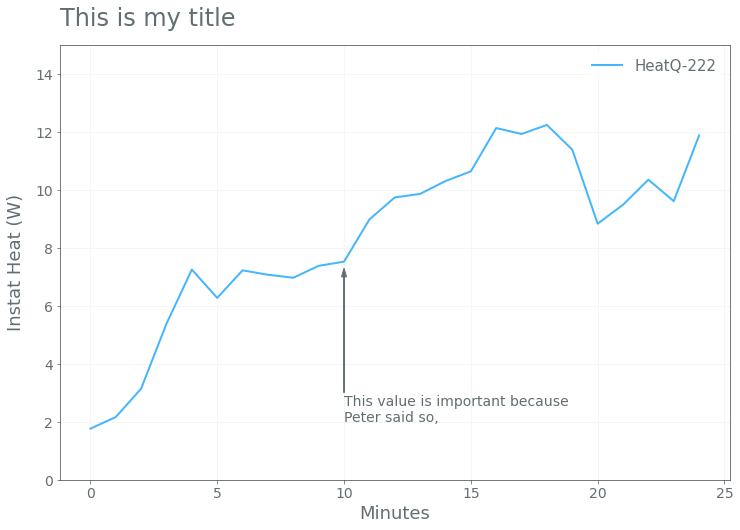

In [235]:
myFunc(df, 'This is my title')

In [40]:
df_time = pd.DataFrame({'Power': [0, 0, 2, 3,4,5,6, 7]},
                        index = [pd.Timestamp('20130101 09:00:00'),
                                 pd.Timestamp('20130101 09:01:00'),
                                 pd.Timestamp('20130101 09:02:00'),
                                 pd.Timestamp('20130101 09:03:00'),
                                 pd.Timestamp('20130101 09:04:00'),
                                 pd.Timestamp('20130101 09:05:00'),
                                 pd.Timestamp('20130101 09:06:00'),
                                 pd.Timestamp('20130101 09:07:00')
                                ])
df_time

,Power
2013-01-01 09:00:00,0
2013-01-01 09:01:00,0
2013-01-01 09:02:00,2
2013-01-01 09:03:00,3
2013-01-01 09:04:00,4
2013-01-01 09:05:00,5
2013-01-01 09:06:00,6
2013-01-01 09:07:00,7


In [41]:
df_time['PreviousValue'] = df_time.Power.shift(1)
df_time

,Power,PreviousValue
2013-01-01 09:00:00,0,NaN
2013-01-01 09:01:00,0,0.0
2013-01-01 09:02:00,2,0.0
2013-01-01 09:03:00,3,2.0
2013-01-01 09:04:00,4,3.0
2013-01-01 09:05:00,5,4.0
2013-01-01 09:06:00,6,5.0
2013-01-01 09:07:00,7,6.0


In [42]:
df_time['CumSum'] = df_time.Power.cumsum()
df_time

,Power,PreviousValue,CumSum
2013-01-01 09:00:00,0,NaN,0
2013-01-01 09:01:00,0,0.0,0
2013-01-01 09:02:00,2,0.0,2
2013-01-01 09:03:00,3,2.0,5
2013-01-01 09:04:00,4,3.0,9
2013-01-01 09:05:00,5,4.0,14
2013-01-01 09:06:00,6,5.0,20
2013-01-01 09:07:00,7,6.0,27


,Power,Previous,NewCol
2013-01-01 09:00:00,0,NaN,NaN
2013-01-01 09:00:02,1,0.0,1.0
2013-01-01 09:00:05,2,1.0,3.0
2013-01-01 09:00:06,4,2.0,6.0


In [31]:
df_time['NewCol']= df_time.Power.rolling(2).sum()
df_time

,Power,Previous,NewCol
2013-01-01 09:00:00,0,NaN,NaN
2013-01-01 09:00:02,1,0.0,1.0
2013-01-01 09:00:05,2,1.0,3.0
2013-01-01 09:00:06,4,2.0,6.0


In [26]:
df_time['CumSum'] = df_time.Power.cumsum()
df_time

,Power,NewCol,CumSum
2013-01-01 09:00:00,0,NaN,0
2013-01-01 09:00:02,1,1.0,1
2013-01-01 09:00:05,2,3.0,3
2013-01-01 09:00:06,4,6.0,7


,Power,NewCol,CumSum,Previous
2013-01-01 09:00:00,0,NaN,0,NaN
2013-01-01 09:00:02,1,1.0,1,0.0
2013-01-01 09:00:05,2,3.0,3,1.0
2013-01-01 09:00:06,4,6.0,7,2.0
